# Regression Analysis

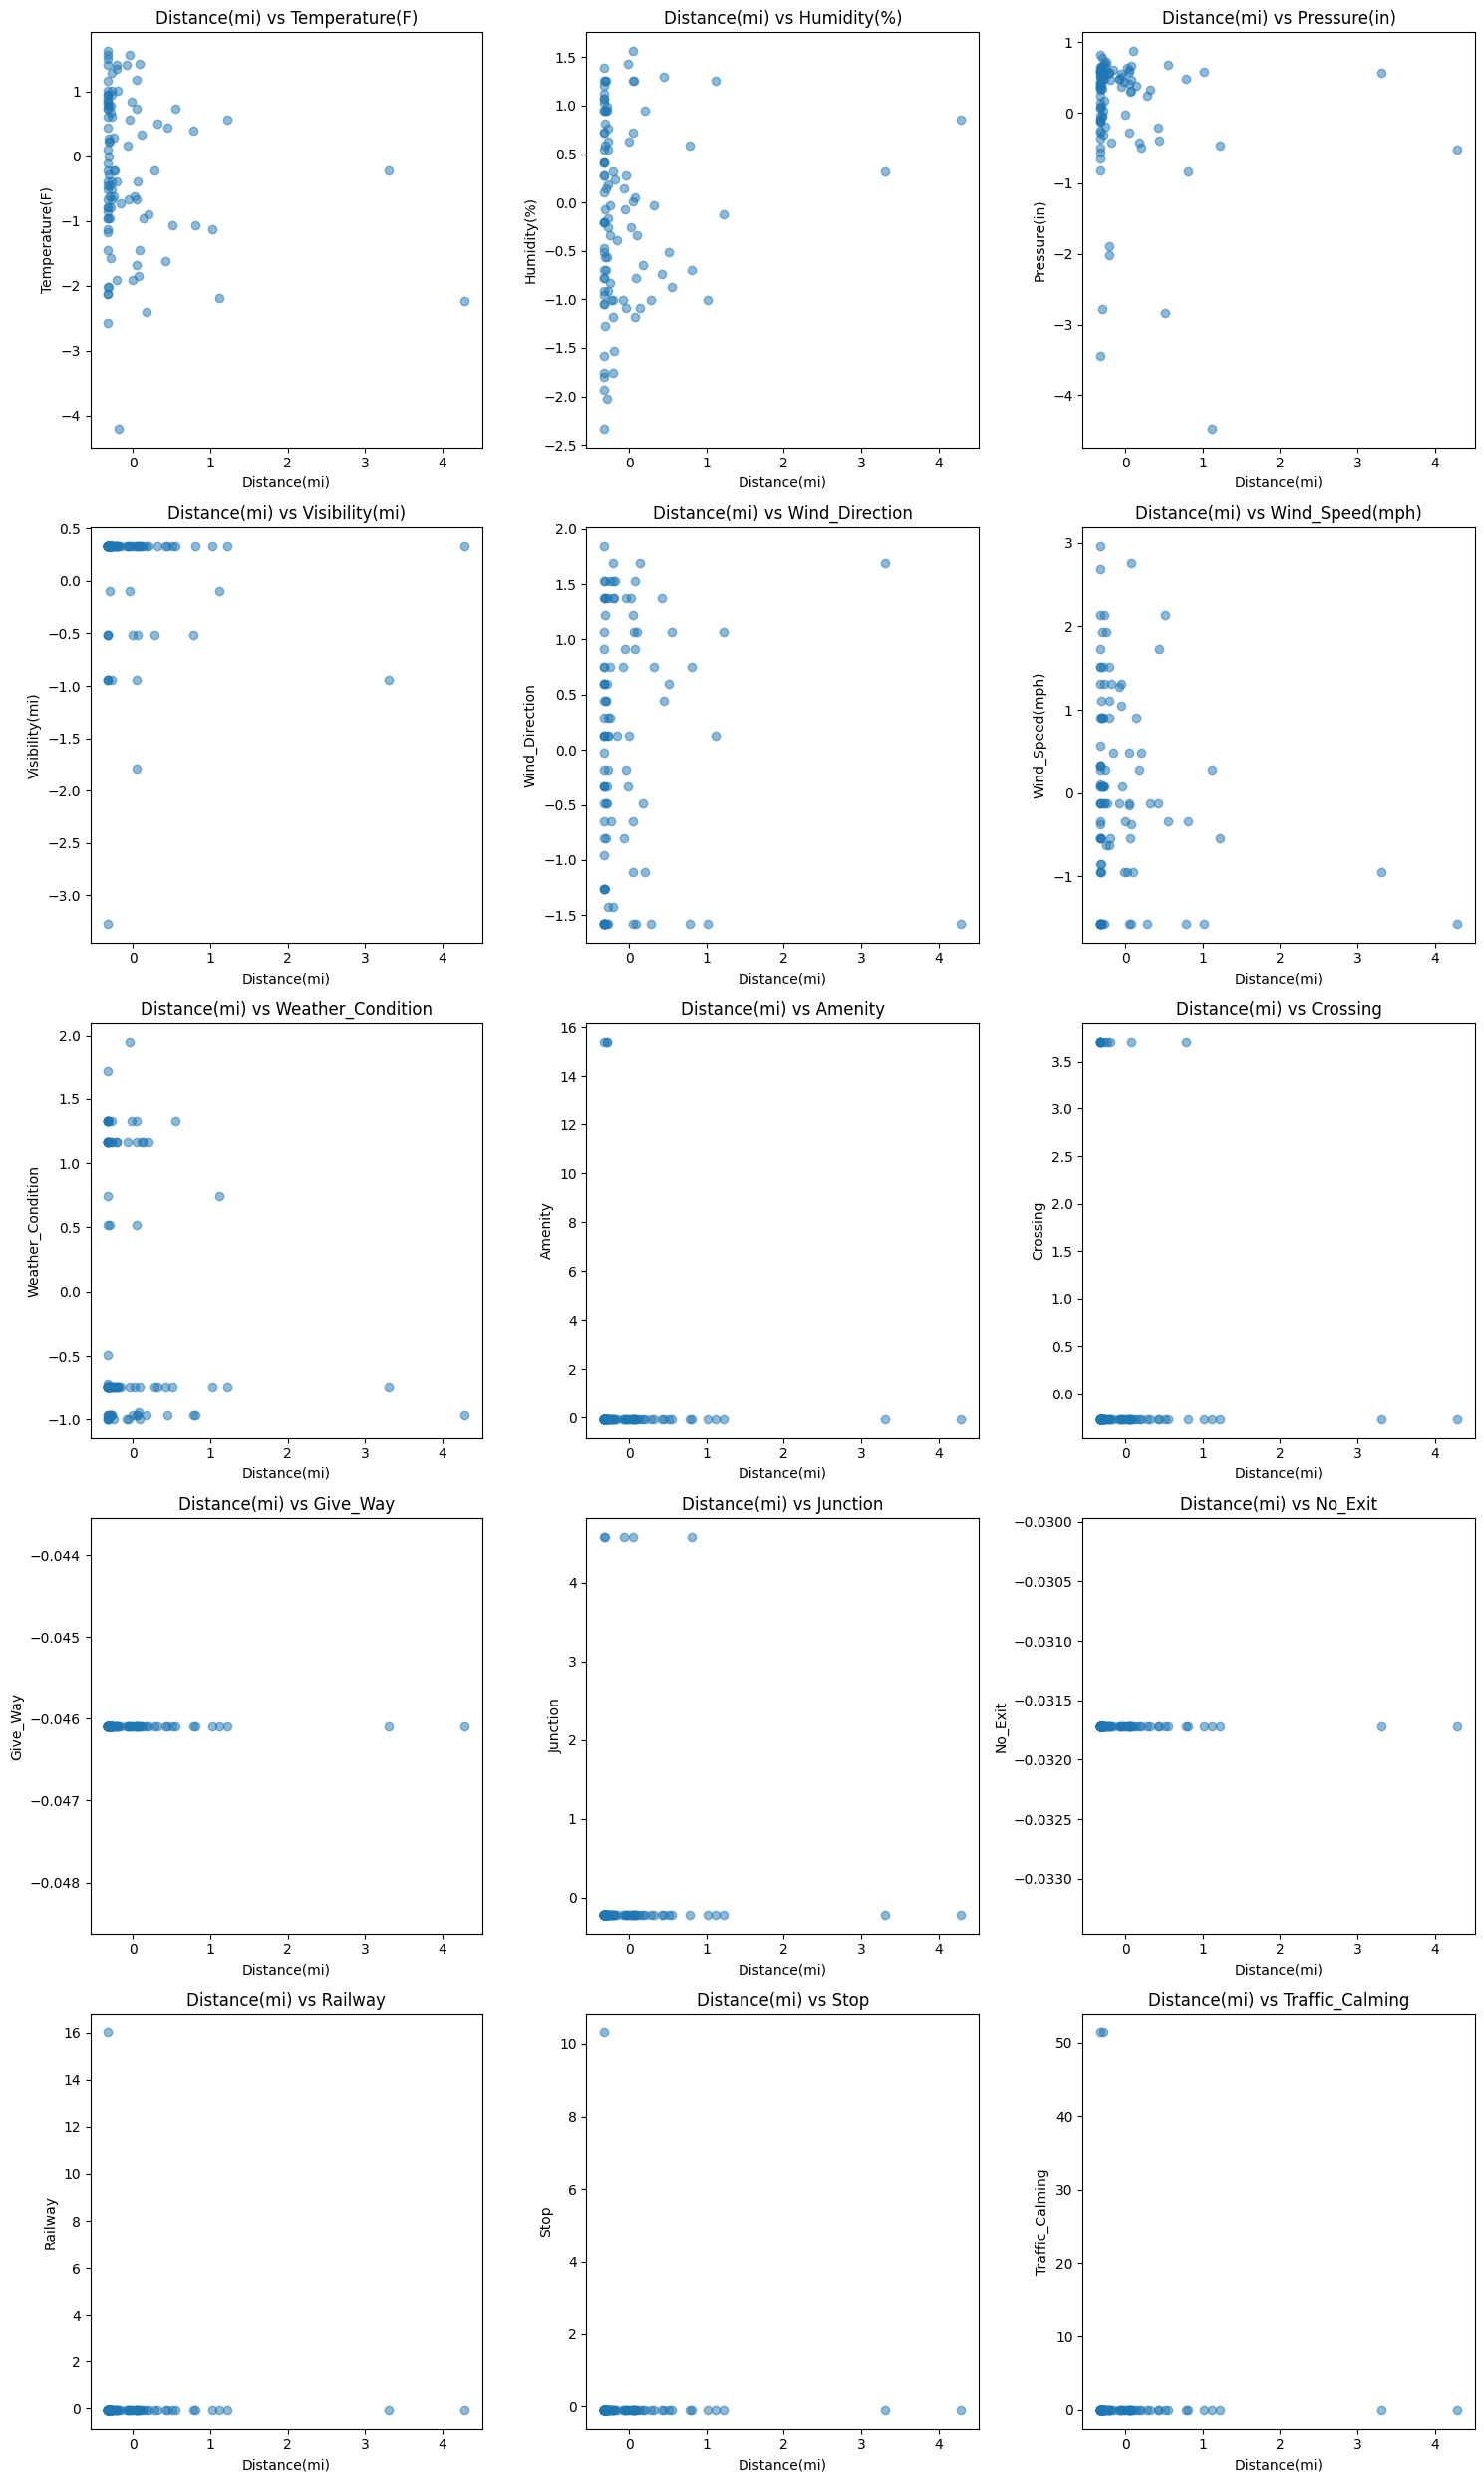

In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Train_Set.csv")

# Create a list of all columns that we are considering
features = [ 
    "Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", 
    "Visibility(mi)", "Wind_Direction", "Wind_Speed(mph)", 
    "Weather_Condition", "Amenity", "Crossing", "Give_Way", "Junction", 
    "No_Exit", "Railway", "Stop", "Traffic_Calming", "Traffic_Signal", 
    "Civil_Twilight", "Duration_Seconds", "cluster", "Severity"
]

# Create all combinations of considered columns (2 at a time)
combinations = list(itertools.combinations(features, 2))

# Limit the number of combinations to visualize
max_plots = 15  # Adjust this number as needed
combinations = combinations[:max_plots]

# Calculate the number of rows and columns for subplots
num_plots = len(combinations)
cols = 3  # Define number of columns
rows = (num_plots // cols) + (num_plots % cols > 0)  # Dynamically calculate rows

# Create a figure with the correct size
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axes array for easier iteration (if rows > 1)
axes = axes.flatten()

# Plot each feature combination
for i, combination in enumerate(combinations):
    ax = axes[i]
    ax.scatter(data[combination[0]], data[combination[1]], alpha=0.5)
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title(f"{combination[0]} vs {combination[1]}")

# Hide unused subplots
for j in range(len(combinations), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Lineare Regression

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X, y)  # Train the model using the entire dataset (or training set if it's separate)

# Predictions
y_pred_lr = model_lr.predict(X_test)  # Use the loaded test set for predictions

# Round predictions, since "Severity" is discrete
y_pred_lr_rounded = y_pred_lr.round()

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)

# Output the results
print(f"Linear Regression - MAE: {mae_lr}")
print(f"Linear Regression - MSE: {mse_lr}")

Linear Regression - MAE: 0.2211240844151135
Linear Regression - MSE: 0.2696651920613049


# K-Nearest Neighbor Regression with Hyperparameter Optimization

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Define the parameter grid for KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2) distances
}

# Perform Grid Search for Hyperparameter Optimization
grid_search_knn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_knn.fit(X, y)  # Train directly on raw features since scaling is not needed

# Get the best model and parameters
best_knn_model = grid_search_knn.best_estimator_
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Predictions using the optimized KNeighborsRegressor
y_pred_knn = best_knn_model.predict(X_test)
y_pred_knn_rounded = y_pred_knn.round()

# Evaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn_rounded)
mse_knn = mean_squared_error(y_test, y_pred_knn_rounded)

# Output the results
print(f"Optimized KNeighbors Regressor - MAE: {mae_knn}")
print(f"Optimized KNeighbors Regressor - MSE: {mse_knn}")

Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Optimized KNeighbors Regressor - MAE: 0.2211240844151135
Optimized KNeighbors Regressor - MSE: 0.2696651920613049


# Decision Tree Regression

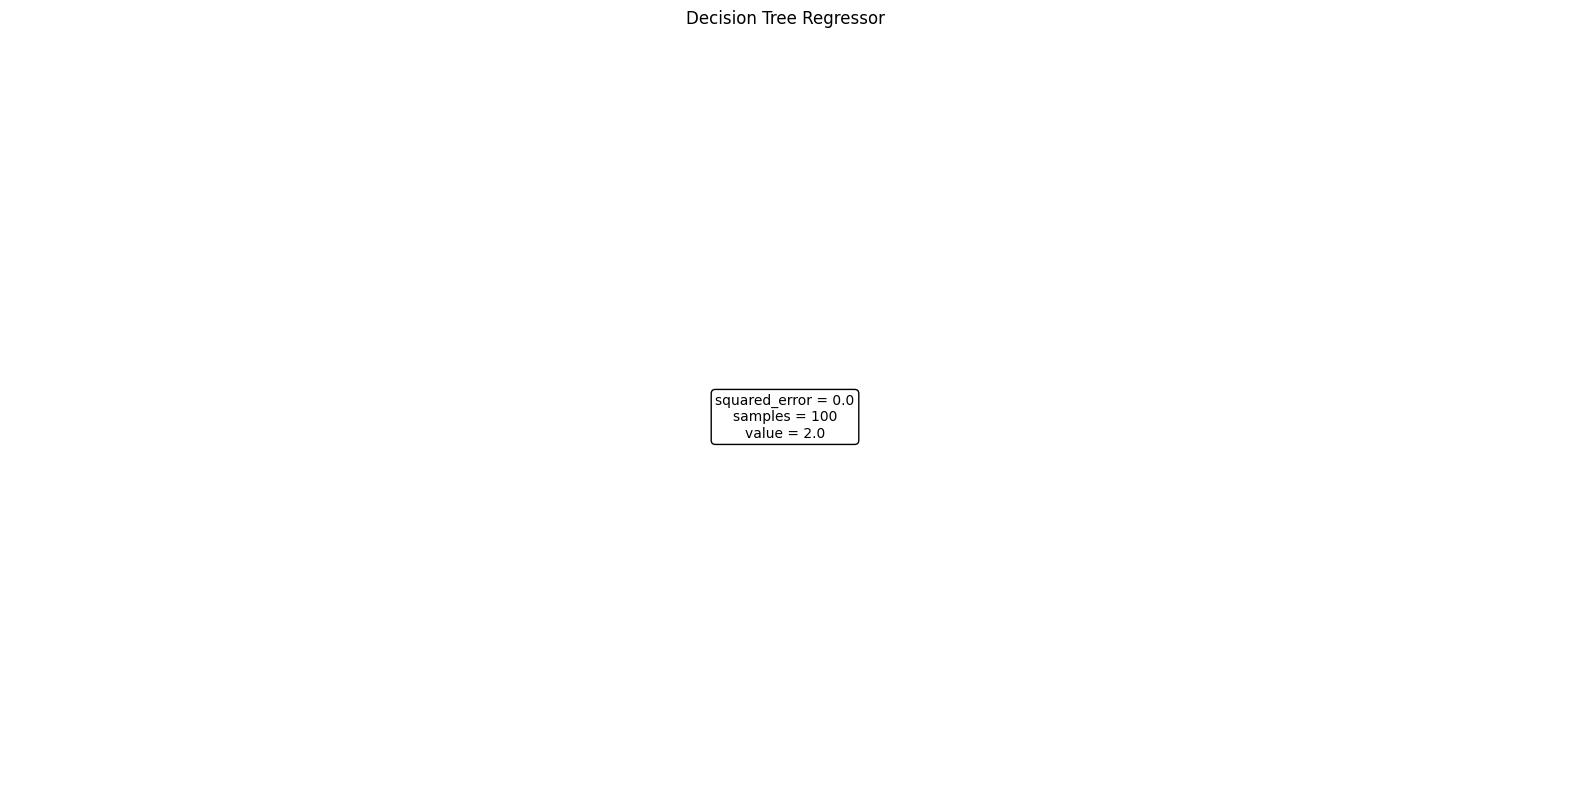

Decision Tree Regression - MAE: 0.2211240844151135
Decision Tree Regression - MSE: 0.2696651920613049


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Decision Tree Regression with pre-pruning
model_dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,  # Limit the depth of the tree
    min_samples_split=5,  # Increase the minimum number of samples required to split a node
    min_samples_leaf=4  # Set the minimum number of samples required to be at a leaf node
)

# Train the model
model_dt.fit(X, y)  # Train the model using the entire dataset (or training set if it's separate)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model_dt,
    feature_names=X.columns,  # Use feature names for better interpretability
    filled=True,             # Color the nodes based on the prediction
    rounded=True,            # Round corners for a cleaner look
    fontsize=10              # Adjust font size for readability
)
plt.title("Decision Tree Regressor")
plt.show()

# Predictions
y_pred_dt = model_dt.predict(X_test)  # Use the loaded test set for predictions

# Round predictions, since "Severity" is discrete
y_pred_dt_rounded = y_pred_dt.round()

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt_rounded)
mse_dt = mean_squared_error(y_test, y_pred_dt_rounded)

# Output the results
print(f"Decision Tree Regression - MAE: {mae_dt}")
print(f"Decision Tree Regression - MSE: {mse_dt}")

# Random Forest Regression

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Random Forest Regression with pre-pruning
model_rf = RandomForestRegressor(
    random_state=42,
    max_depth=10,  # Limit the depth of the trees
    min_samples_split=5,  # Increase the minimum number of samples required to split a node
    min_samples_leaf=4,  # Set the minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Use only a subset of features for each split
    n_estimators=100,  # Number of trees in the forest
    n_jobs=-1  # Use all CPU cores for parallel processing
)

# Train the model
model_rf.fit(X, y)  # Train the model using the entire dataset (or training set if it's separate)

# Predictions
y_pred_rf = model_rf.predict(X_test)  # Use the loaded test set for predictions

# Round predictions, since "Severity" is discrete
y_pred_rf_rounded = y_pred_rf.round()

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf_rounded)
mse_rf = mean_squared_error(y_test, y_pred_rf_rounded)

# Output the results
print(f"Random Forest Regression - MAE: {mae_rf}")
print(f"Random Forest Regression - MSE: {mse_rf}")


Random Forest Regression - MAE: 0.2211240844151135
Random Forest Regression - MSE: 0.2696651920613049


# ANN for Regression - MLPRegressor with Hyperparameter Optimization

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate features and target variable from the training data
X = data.drop(columns=["Severity"])
y = data["Severity"]

# Load the test set (assuming the test set has both features and target variable)
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Define the parameter grid for MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform Grid Search for Hyperparameter Optimization
grid_search_mlp = GridSearchCV(
    MLPRegressor(max_iter=500, random_state=42),
    param_grid_mlp,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_mlp.fit(X, y)  # Train directly on raw features since scaling is not needed

# Get the best model and parameters
best_mlp_model = grid_search_mlp.best_estimator_
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Predictions using the optimized MLPRegressor
y_pred_mlp = best_mlp_model.predict(X_test)
y_pred_mlp_rounded = y_pred_mlp.round()

# Evaluation
mae_mlp = mean_absolute_error(y_test, y_pred_mlp_rounded)
mse_mlp = mean_squared_error(y_test, y_pred_mlp_rounded)

# Output the results
print(f"Optimized MLP Regressor - MAE: {mae_mlp}")
print(f"Optimized MLP Regressor - MSE: {mse_mlp}")


Best parameters for MLP: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Optimized MLP Regressor - MAE: 0.32607634104479416
Optimized MLP Regressor - MSE: 0.5688418304445573


# Gradient Boosting Regressor

In [9]:
# Importiere die nötigen Bibliotheken
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X, y)

# Vorhersagen
y_pred_gb = model_gb.predict(X_test)

# Ergebnisse runden, da "Severity" diskret ist
y_pred_gb_rounded = y_pred_gb.round()

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb_rounded)
mse_gb = mean_squared_error(y_test, y_pred_gb_rounded)

print(f"Gradient Boosting Regressor - MAE: {mae_gb}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb}")


Gradient Boosting Regressor - MAE: 0.2211240844151135
Gradient Boosting Regressor - MSE: 0.2696651920613049


## Boosting with XGBoost

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# xgboost Regressor
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=42)  # n_jobs=-1 nutzt alle CPU-Kerne
model_xgb.fit(X, y)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Round predictions, since "Severity" is discrete
y_pred_xgb_rounded = y_pred_xgb.round()

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_rounded)
mse_xgb = mean_squared_error(y_test, y_pred_xgb_rounded)

# Output the results
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MSE: {mse_xgb}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/justus/Documents/GitHub/DataMining/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B22D7F05-77FA-34A6-8757-C605D2CFE1AD> /Users/justus/Documents/GitHub/DataMining/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


# Evaluation and Visulization

Lineare Regression - MAE: 0.2211, MSE: 0.2697, R^2: -0.1808
Random Forest Regression - MAE: 0.2211, MSE: 0.2697, R^2: -0.1808
Gradient Boosting Regressor - MAE: 0.2211, MSE: 0.2697, R^2: -0.1808
MLP Regressor - MAE: 0.3261, MSE: 0.5688, R^2: -1.4908
Decision Tree Regressor - MAE: 0.2211, MSE: 0.2697, R^2: -0.1808
K-Nearest Neighbors Regressor - MAE: 0.2211, MSE: 0.2697, R^2: -0.1808


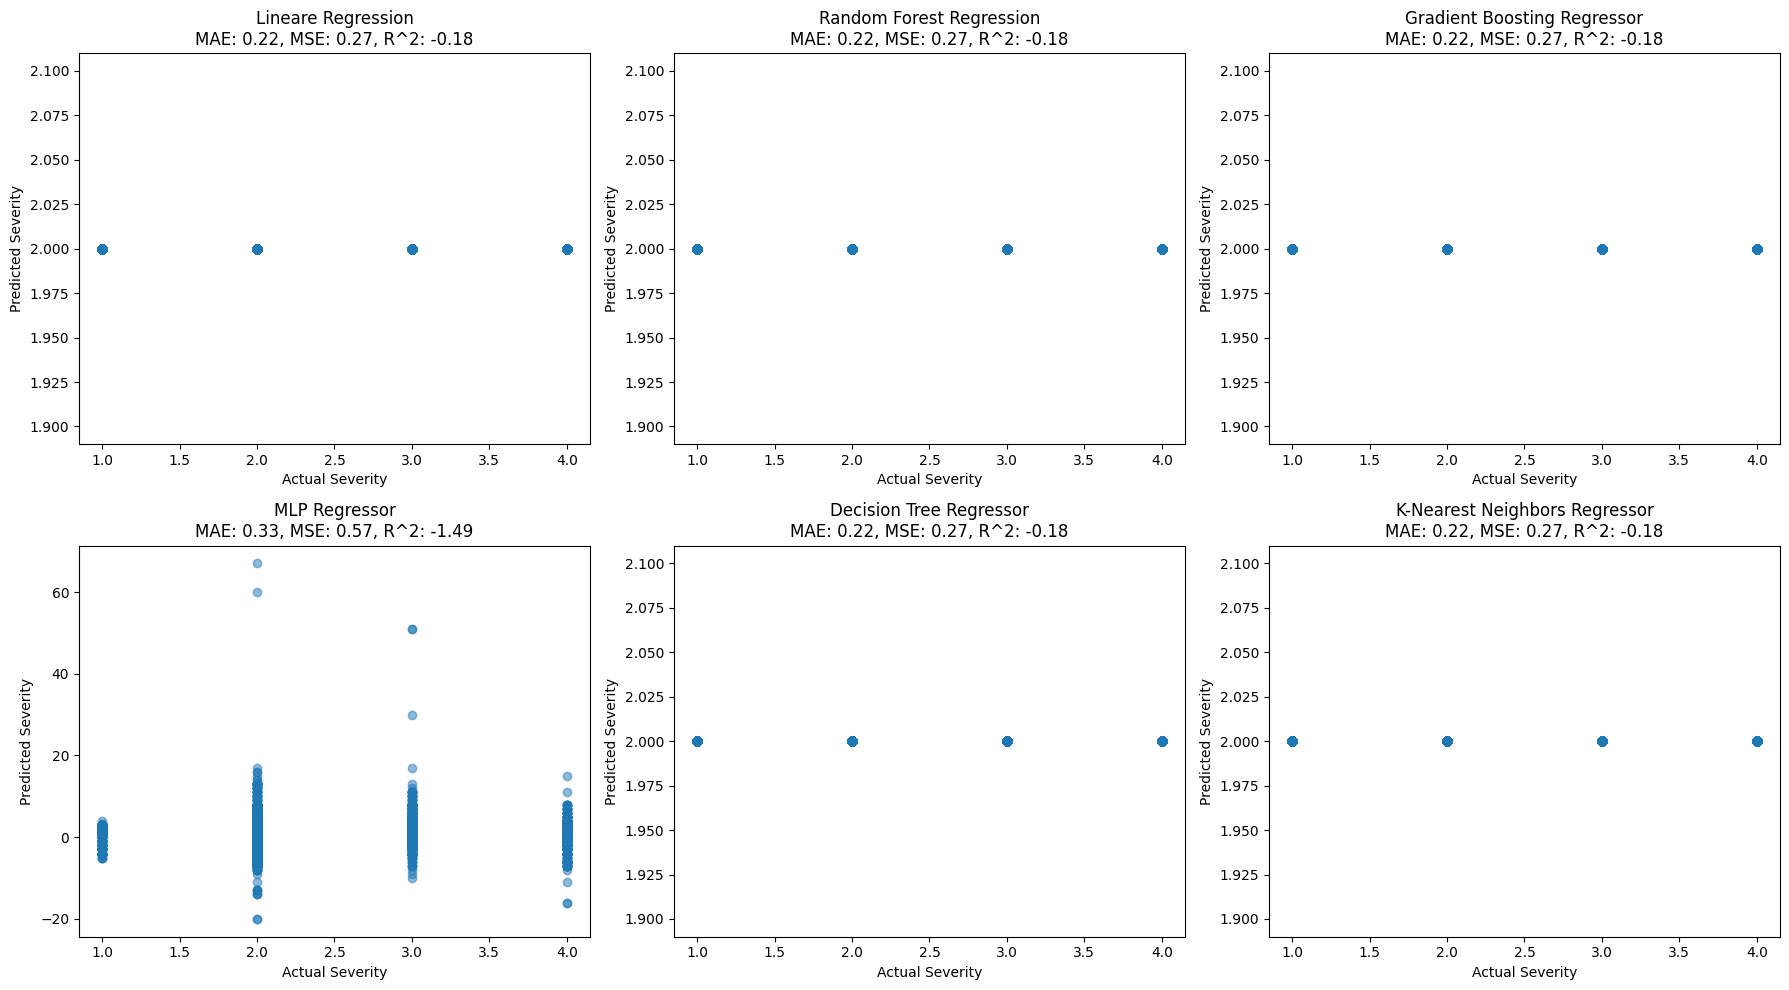

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Berechne die Evaluierungsmetriken für jedes Modell
mae_lr = mean_absolute_error(y_test, y_pred_lr_rounded)
mse_lr = mean_squared_error(y_test, y_pred_lr_rounded)
r2_lr = r2_score(y_test, y_pred_lr_rounded)

mae_rf = mean_absolute_error(y_test, y_pred_rf_rounded)
mse_rf = mean_squared_error(y_test, y_pred_rf_rounded)
r2_rf = r2_score(y_test, y_pred_rf_rounded)

mae_gb = mean_absolute_error(y_test, y_pred_gb_rounded)
mse_gb = mean_squared_error(y_test, y_pred_gb_rounded)
r2_gb = r2_score(y_test, y_pred_gb_rounded)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp_rounded)
mse_mlp = mean_squared_error(y_test, y_pred_mlp_rounded)
r2_mlp = r2_score(y_test, y_pred_mlp_rounded)

mae_dt = mean_absolute_error(y_test, y_pred_dt_rounded)
mse_dt = mean_squared_error(y_test, y_pred_dt_rounded)
r2_dt = r2_score(y_test, y_pred_dt_rounded)

mae_knn = mean_absolute_error(y_test, y_pred_knn_rounded)
mse_knn = mean_squared_error(y_test, y_pred_knn_rounded)
r2_knn = r2_score(y_test, y_pred_knn_rounded)

# Ausgabe der Metriken
print(f"Lineare Regression - MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R^2: {r2_lr:.4f}")
print(f"Random Forest Regression - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R^2: {r2_rf:.4f}")
print(f"Gradient Boosting Regressor - MAE: {mae_gb:.4f}, MSE: {mse_gb:.4f}, R^2: {r2_gb:.4f}")
print(f"MLP Regressor - MAE: {mae_mlp:.4f}, MSE: {mse_mlp:.4f}, R^2: {r2_mlp:.4f}")
print(f"Decision Tree Regressor - MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R^2: {r2_dt:.4f}")
print(f"K-Nearest Neighbors Regressor - MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, R^2: {r2_knn:.4f}")

# Vergleich von tatsächlichen vs. vorhergesagten Werten für jedes Modell
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Lineare Regression
axs[0, 0].scatter(y_test, y_pred_lr_rounded, alpha=0.5)
axs[0, 0].set_title(f"Lineare Regression\nMAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R^2: {r2_lr:.2f}")
axs[0, 0].set_xlabel("Actual Severity")
axs[0, 0].set_ylabel("Predicted Severity")

# Random Forest Regression
axs[0, 1].scatter(y_test, y_pred_rf_rounded, alpha=0.5)
axs[0, 1].set_title(f"Random Forest Regression\nMAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")
axs[0, 1].set_xlabel("Actual Severity")
axs[0, 1].set_ylabel("Predicted Severity")

# Gradient Boosting Regressor
axs[0, 2].scatter(y_test, y_pred_gb_rounded, alpha=0.5)
axs[0, 2].set_title(f"Gradient Boosting Regressor\nMAE: {mae_gb:.2f}, MSE: {mse_gb:.2f}, R^2: {r2_gb:.2f}")
axs[0, 2].set_xlabel("Actual Severity")
axs[0, 2].set_ylabel("Predicted Severity")

# MLP Regressor
axs[1, 0].scatter(y_test, y_pred_mlp_rounded, alpha=0.5)
axs[1, 0].set_title(f"MLP Regressor\nMAE: {mae_mlp:.2f}, MSE: {mse_mlp:.2f}, R^2: {r2_mlp:.2f}")
axs[1, 0].set_xlabel("Actual Severity")
axs[1, 0].set_ylabel("Predicted Severity")

# Decision Tree Regressor
axs[1, 1].scatter(y_test, y_pred_dt_rounded, alpha=0.5)
axs[1, 1].set_title(f"Decision Tree Regressor\nMAE: {mae_dt:.2f}, MSE: {mse_dt:.2f}, R^2: {r2_dt:.2f}")
axs[1, 1].set_xlabel("Actual Severity")
axs[1, 1].set_ylabel("Predicted Severity")

# K-Nearest Neighbors Regressor
axs[1, 2].scatter(y_test, y_pred_knn_rounded, alpha=0.5)
axs[1, 2].set_title(f"K-Nearest Neighbors Regressor\nMAE: {mae_knn:.2f}, MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")
axs[1, 2].set_xlabel("Actual Severity")
axs[1, 2].set_ylabel("Predicted Severity")

plt.tight_layout()
plt.show()
